# Projeto 5: Classificação de Texto e Análise de Sentimentos

- Base de dados: www.kaggle.com/sid321axn/amazon-alexa-reviews

# Etapa 1: Importação das bibliotecas

In [8]:

import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Etapa 2: Importação da base de dados

In [9]:
df_alexa = pd.read_csv(r'D:\GITHUB\machine-learning-studies\Redes Neurais para Classificação\classification-for-text-and-feelings-analysis\amazon-alexa.tsv', sep = r'\t')

C:\Users\felip\AppData\Local\Temp\ipykernel_5672\1375074999.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_alexa = pd.read_csv(r'D:\GITHUB\machine-learning-studies\Redes Neurais para Classificação\classification-for-text-and-feelings-analysis\amazon-alexa.tsv', sep = r'\t')


In [10]:
df_alexa.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [11]:
df_alexa.keys()

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [12]:
df_alexa.tail(10)

,rating,date,variation,verified_reviews,feedback
3140,4,30-Jul-18,White Dot,Barry,1
3141,3,30-Jul-18,Black Dot,,1
3142,4,30-Jul-18,White Dot,My three year old loves it. Good for doing ba...,1
3143,5,30-Jul-18,Black Dot,Awesome device wish I bought one ages ago.,1
3144,5,30-Jul-18,Black Dot,love it,1
3145,5,30-Jul-18,Black Dot,"""Perfect for kids, adults and everyone in betw...",1
3146,5,30-Jul-18,Black Dot,"""Listening to music, searching locations, chec...",1
3147,5,30-Jul-18,Black Dot,"""I do love these things, i have them running m...",1
3148,5,30-Jul-18,White Dot,"""Only complaint I have is that the sound quali...",1
3149,4,29-Jul-18,Black Dot,Good,1


In [13]:
df_alexa['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       "Sometimes while playing a game, you can answe...
3       "I have had a lot of fun with this thing. My 4...
4                                                   Music
                              ...                        
3145    "Perfect for kids, adults and everyone in betw...
3146    "Listening to music, searching locations, chec...
3147    "I do love these things, i have them running m...
3148    "Only complaint I have is that the sound quali...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

# Etapa 3: Visualização dos dados

In [14]:
positive = df_alexa[df_alexa['feedback'] == 1]

In [15]:
positive

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"""Perfect for kids, adults and everyone in betw...",1
3146,5,30-Jul-18,Black Dot,"""Listening to music, searching locations, chec...",1
3147,5,30-Jul-18,Black Dot,"""I do love these things, i have them running m...",1
3148,5,30-Jul-18,White Dot,"""Only complaint I have is that the sound quali...",1


In [16]:
negative = df_alexa[df_alexa['feedback'] == 0]

In [17]:
negative

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"""It's like Siri, in fact, Siri answers more ac...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"""Stopped working after 2 weeks ,didn't follow ...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


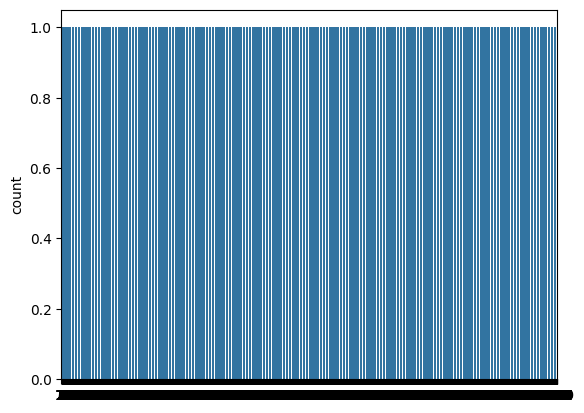

In [18]:
sns.countplot(df_alexa['feedback'], label = 'Count');

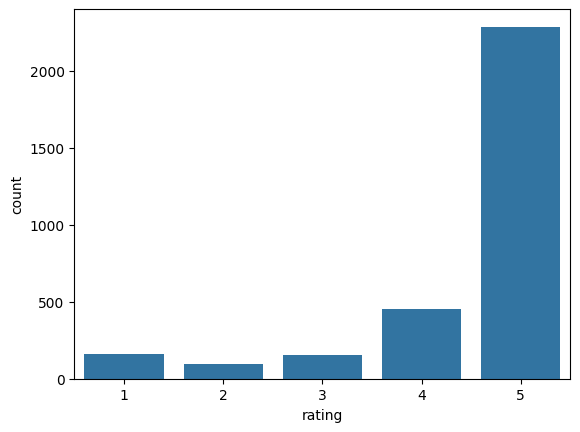

In [19]:
sns.countplot(x = 'rating', data = df_alexa);

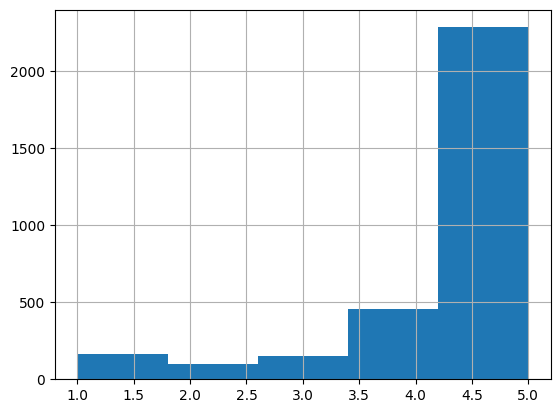

In [20]:
df_alexa['rating'].hist(bins = 5);

C:\Users\felip\AppData\Local\Temp\ipykernel_5672\2296262795.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'variation', y = 'rating', data = df_alexa, palette = 'deep');


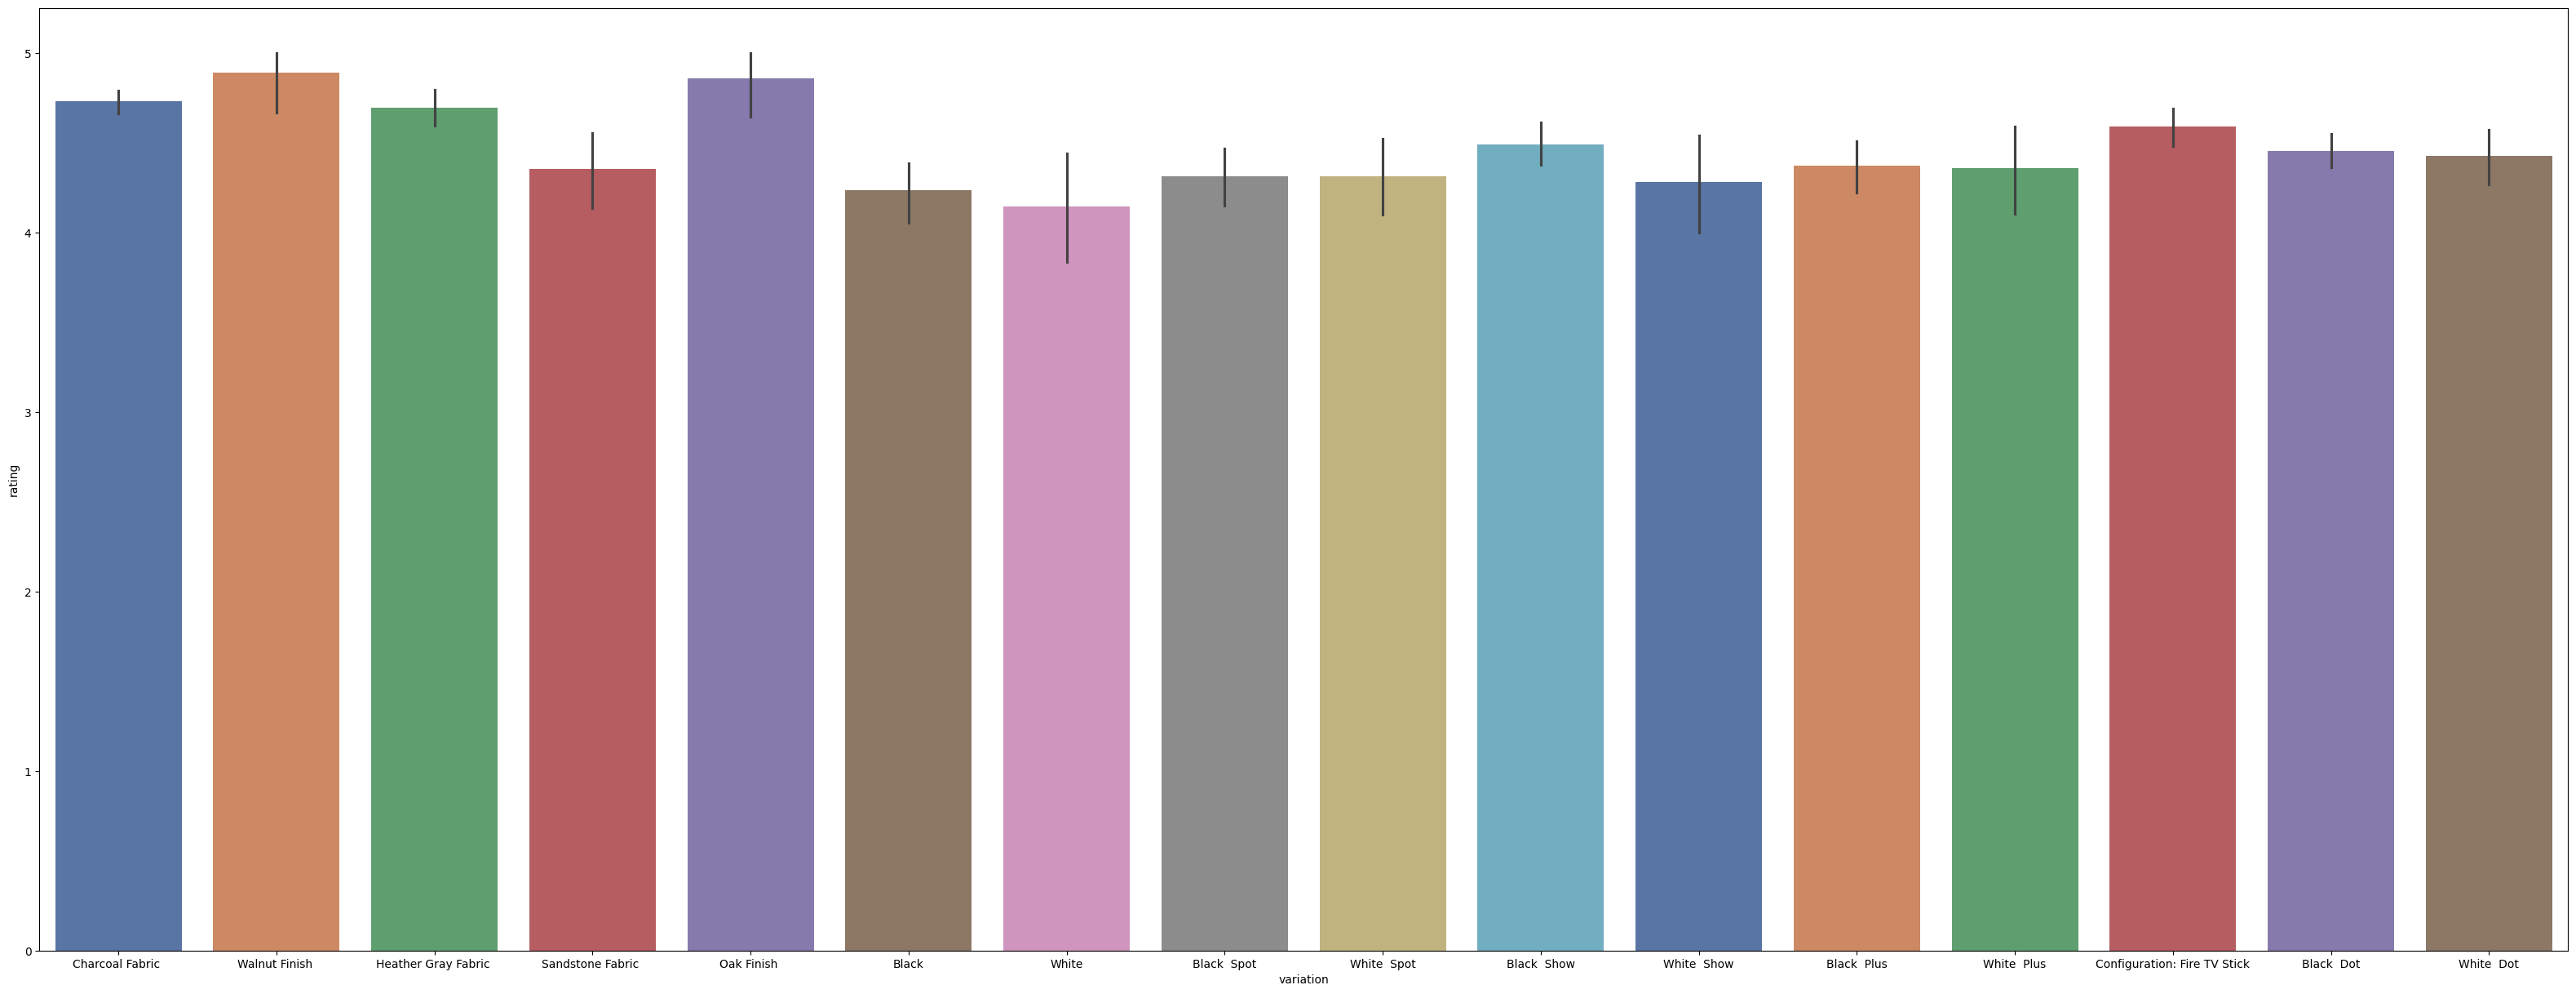

In [21]:
plt.figure(figsize = (40,15))
sns.barplot(x = 'variation', y = 'rating', data = df_alexa, palette = 'deep');

# Etapa 4: Limpeza dos dados

In [22]:
df_alexa = df_alexa.drop(['date', 'rating'], axis = 1)

In [23]:
df_alexa.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,Charcoal Fabric,Music,1


In [24]:
variation_dummies = pd.get_dummies(df_alexa['variation'])

In [25]:
variation_dummies

,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3146,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3147,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3148,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [26]:
df_alexa.drop(['variation'], axis = 1, inplace=True)

In [27]:
df_alexa.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"""Sometimes while playing a game, you can answe...",1
3,"""I have had a lot of fun with this thing. My 4...",1
4,Music,1


In [28]:
df_alexa = pd.concat([df_alexa, variation_dummies], axis = 1)

In [29]:
df_alexa.head()

,verified_reviews,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,Loved it!,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,"""Sometimes while playing a game, you can answe...",1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,"""I have had a lot of fun with this thing. My 4...",1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,Music,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


# Exemplo de tokenização


In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
sample_data = ['This is the first document.',
               'This document is the second document.',
               'And this is the third one.',
               'Is this the first document?']

In [32]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [34]:
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [35]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


# Tokenização da base de dados

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
# Replace NaN values with an empty string
df_alexa['verified_reviews'] = df_alexa['verified_reviews'].fillna('')
alexa_countvectorizer = vectorizer.fit_transform(df_alexa['verified_reviews'])

In [38]:
alexa_countvectorizer.shape

(3150, 4044)

In [39]:
type(alexa_countvectorizer)

scipy.sparse._csr.csr_matrix

In [41]:
print(vectorizer.get_feature_names_out())

['00' '000' '07' ... 'zzzz' 'zzzzzzz' 'útil']


In [42]:
print(alexa_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [43]:
df_alexa.drop(['verified_reviews'], axis = 1, inplace=True)

In [44]:
df_alexa.head()

,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [45]:
reviews = pd.DataFrame(alexa_countvectorizer.toarray())

In [46]:
reviews.head()

,0,1,2,3,4,5,6,7,8,9,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df_alexa = pd.concat([df_alexa, reviews], axis = 1)

In [48]:
df_alexa.head()

,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1,False,False,False,False,False,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,1,False,False,False,False,False,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,1,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,1,False,False,False,False,False,True,False,False,False,...,0,1,0,0,0,0,0,0,0,0
4,1,False,False,False,False,False,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [49]:
X = df_alexa.drop(['feedback'], axis = 1)

In [50]:
X

,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,False,False,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,False,False,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,False,False,False,False,False,True,False,False,False,False,...,0,1,0,0,0,0,0,0,0,0
4,False,False,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,False,True,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3146,False,True,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3147,False,True,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3148,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [51]:
y = df_alexa['feedback']

In [52]:
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [54]:
X_train.shape

(2520, 4060)

In [55]:
X_test.shape

(630, 4060)

# Etapa 5: Construção e treinamento do modelo

In [56]:
# 4060 -> 400 -> 400 -> 1
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units = 400, activation='relu', input_shape=(4060,)))
classifier.add(tf.keras.layers.Dense(units = 400, activation='relu'))
classifier.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

d:\GITHUB\machine-learning-studies\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 400)            │     1,624,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           401 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,785,201 (6.81 MB)

 Trainable params: 1,785,201 (6.81 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [60]:

X_train = X_train.astype(int)

epochs_hist = classifier.fit(X_train, y_train, epochs=10)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8795 - loss: 0.3689
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9571 - loss: 0.0897
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9886 - loss: 0.0403
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9957 - loss: 0.0160
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9935 - loss: 0.0161
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9938 - loss: 0.0178
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9953 - loss: 0.0152
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9952 - loss: 0.0162
Epoch 9/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9931 - loss: 0.0171
Epoch 10/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9966 - loss: 0.0109


# Etapa 6: Avaliação do modelo

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

In [62]:
y_pred_train = classifier.predict(X_train)
y_pred_train

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[1.       ],
       [0.9999938],
       [1.       ],
       ...,
       [1.       ],
       [0.999729 ],
       [0.9999906]], dtype=float32)

In [63]:
y_pred_train = (y_pred_train > 0.5)
y_pred_train

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [64]:
cm = confusion_matrix(y_train, y_pred_train)
cm

array([[ 186,   12],
       [   1, 2321]])

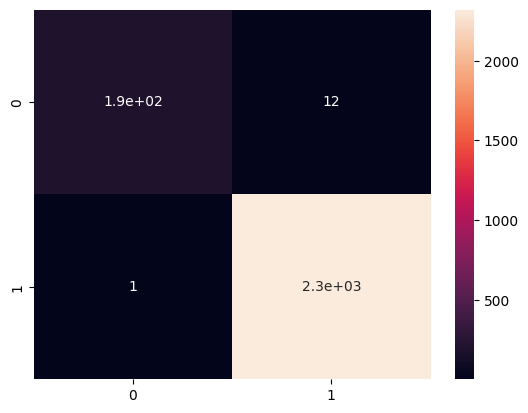

In [65]:
sns.heatmap(cm, annot=True);

In [67]:
X_test = X_test.astype(int)

y_pred_test = classifier.predict(X_test)
y_pred_test = (y_pred_test > 0.5)
cm = confusion_matrix(y_test, y_pred_test)
cm

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[ 18,  41],
       [  6, 565]])

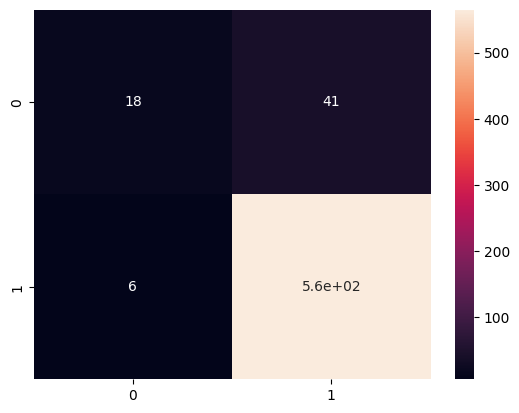

In [68]:
sns.heatmap(cm, annot=True);

In [69]:
epochs_hist.history.keys()

dict_keys(['accuracy', 'loss'])

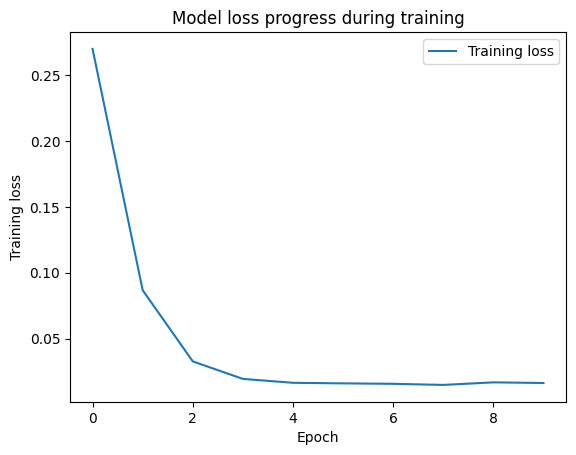

In [70]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model loss progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(['Training loss'])

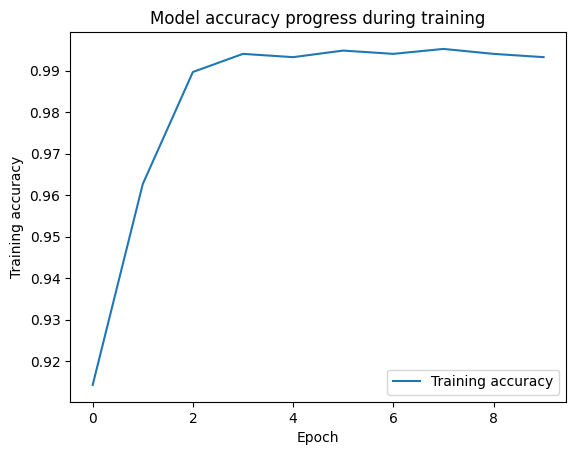

In [71]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model accuracy progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.legend(['Training accuracy'])